# Ejercicio 4 – Predicción de series temporales con LSTM

## ¿Qué es una LSTM?

Las **LSTM (Long Short-Term Memory)** son un tipo especial de redes neuronales recurrentes (RNN) diseñadas para trabajar con **secuencias de datos** como las series temporales. A diferencia de redes tradicionales, las LSTM son capaces de **"recordar" patrones a largo plazo** gracias a su arquitectura con compuertas de memoria.

Esto las hace especialmente útiles para:

- Predecir comportamientos futuros en una serie temporal
- Capturar tendencias y estacionalidades implícitas
- Modelar relaciones no lineales complejas

---

### Arquitectura básica

Una red LSTM se alimenta de "ventanas deslizantes" de datos (secuencias) y aprende a predecir el siguiente valor. Por ejemplo:

```
Input: [yₜ₋₄, yₜ₋₃, yₜ₋₂, yₜ₋₁] → Output: [yₜ]
```

La red aprende patrones en el orden temporal de los datos, lo que la hace muy potente para predicción.

---

## Flujo de trabajo

```mermaid
flowchart TD
    A[Dataset limpio] --> B[Normalización]
    B --> C[Creación de secuencias/ventanas]
    C --> D[División en train y test]
    D --> E[Construcción del modelo LSTM]
    E --> F[Entrenamiento]
    F --> G[Predicción sobre test]
    G --> H[Evaluación y visualización]
```

---

## Requisitos
```bash
pip install tensorflow scikit-learn
```

---

## Ejercicio práctico

### Paso 1: Cargar y preparar datos

In [3]:
import pandas as pd

# Cargar y preparar datos
df = pd.read_csv("data/m5_consumo_energia_train.csv", index_col=0)
df = df.set_index(pd.to_datetime(df.index))

df['dt'] = df.index

# Usamos solo la columna objetivo
serie = df["Energia Consumida"].fillna(method="ffill")

/var/folders/kh/vywr4v293s1fmshzbj358gw40000gn/T/ipykernel_58960/641227134.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  serie = df["Energia Consumida"].fillna(method="ffill")


---

### Paso 2: Normalizar los datos

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie.values.reshape(-1, 1))

---

### Paso 3: Crear secuencias de entrada/salida

In [5]:
def crear_secuencias(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 30  # Usamos los últimos 30 días para predecir 1
X, y = crear_secuencias(serie_scaled, n_steps)

# Redimensionar X para LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

---

### Paso 4: Dividir en entrenamiento y validación

In [6]:
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

---

### Paso 5: Construir y entrenar el modelo LSTM

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

2025-03-26 08:29:57.200365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jballesteros/.virtualenvs/ibbi/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - loss: 0.2126 - val_loss: 0.1191
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.1929 - val_loss: 0.0939
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.1381 - val_loss: 0.0673
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1162 - val_loss: 0.0371
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0557 - val_loss: 0.0614
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0541 - val_loss: 0.0388
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0570 - val_loss: 0.0320
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0472 - val_loss: 0.0321
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0557 - val_loss: 0.0344
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0428 - val_loss: 0.0386
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0459 - val_loss: 0.0402
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0480 - val_loss: 0.03

---

### Paso 6: Predecir y evaluar

In [8]:
y_pred = model.predict(X_val)

# Invertir normalización
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


---

### Paso 7: Visualizar resultados

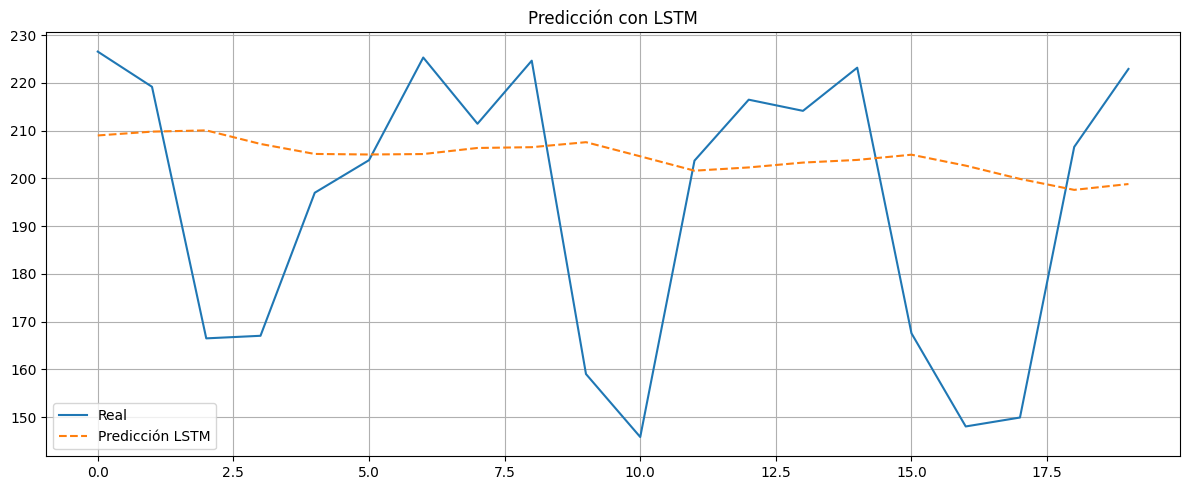

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_val_inv, label="Real")
plt.plot(y_pred_inv, label="Predicción LSTM", linestyle="--")
plt.title("Predicción con LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

### Paso 8: Evaluar con métricas

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_val_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 24.62
RMSE: 30.65


---

## ✅ Resultado esperado

- Preparar series temporales para modelos LSTM.
- Construir y entrenar una red neuronal secuencial.
- Comparar los resultados de predicción con datos reales.
- Evaluar el rendimiento con MAE y RMSE.